In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [3]:
df=pd.read_csv('Heart2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BP Meds              4240 non-null   float64
 1   prevalentStroke      4240 non-null   float64
 2   prevalentHyp         4240 non-null   float64
 3   diabetes             4240 non-null   float64
 4   high_risk_age_group  4240 non-null   int64  
 5   bmi_risk             4240 non-null   int64  
 6   smoking_riskkk       4240 non-null   int64  
 7   cholesterol_risk     4240 non-null   int64  
 8   gender_risk          4240 non-null   int64  
 9   Heartrate_risk       4240 non-null   int64  
 10  Diastolic_BP_risk    4240 non-null   int64  
 11  Systolic_BP_risk     4240 non-null   int64  
 12  Glucose_risk         4240 non-null   int64  
 13  education_new        4240 non-null   float64
 14  Heart-Att            4240 non-null   int64  
dtypes: float64(5), int64(10)
memory usage:

In [5]:
df['BP_RISK']=df['prevalentHyp']+df['Systolic_BP_risk']+df['Diastolic_BP_risk']

In [6]:
df['Life_style_Risk']=df['bmi_risk']+df['cholesterol_risk']+df['smoking_riskkk']

In [7]:
df['Medical_History_Risk']=df['diabetes']+df['prevalentStroke']+df['BP Meds']+df['Heartrate_risk']

In [8]:
df['Life_style+age']=df['Life_style_Risk']+df['high_risk_age_group']

In [9]:
df['edu+gen+age']=df['education_new']+df['gender_risk']+df['high_risk_age_group']

In [10]:
df['Bp+med_his']=df['BP_RISK']+df['Medical_History_Riskk']

KeyError: 'Medical_History_Riskk'

In [17]:
df.drop('Bp+med_his',axis=1,inplace=True)

In [19]:
pd.crosstab(df['Bp+med_his'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Bp+med_his,,
0.0,0.910638,0.089362
1.0,0.852433,0.147567
2.0,0.821622,0.178378
3.0,0.787383,0.212617
4.0,0.739938,0.260062
5.0,0.691275,0.308725
6.0,0.593750,0.406250
7.0,0.600000,0.400000


In [13]:
df['Bp+med_his'].value_counts()

Bp+med_his
0.0    2115
1.0     637
3.0     428
2.0     370
4.0     323
5.0     298
6.0      64
7.0       4
8.0       1
Name: count, dtype: int64

In [14]:
df['Medical_History_Risk'].value_counts()

Medical_History_Risk
0.0    3911
1.0     301
2.0      27
3.0       1
Name: count, dtype: int64

In [15]:
pd.crosstab(df['Medical_History_Risk'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Medical_History_Risk,,
0.0,0.862951,0.137049
1.0,0.691030,0.308970
2.0,0.481481,0.518519
3.0,0.000000,1.000000


In [16]:
df['Medical_History_Riskk']=df['Medical_History_Risk'].replace({0:0,1:1,2:2,3:2})

In [20]:
df['Bp+gen+age']=df['BP_RISK']+df['gender_risk']+df['high_risk_age_group']

In [21]:
df['BP+glucose']=df['BP_RISK']+df['Glucose_risk']

In [22]:
df['age+glucose']=df['high_risk_age_group']+df['Glucose_risk']

In [23]:
df['gen+glucose']=df['gender_risk']+df['Glucose_risk']

In [25]:
df['Life+age+edu']=df['Life_style_Risk']+df['high_risk_age_group']+df['education_new']

In [24]:
df.columns

Index(['BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'high_risk_age_group', 'bmi_risk', 'smoking_riskkk', 'cholesterol_risk',
       'gender_risk', 'Heartrate_risk', 'Diastolic_BP_risk',
       'Systolic_BP_risk', 'Glucose_risk', 'education_new', 'Heart-Att',
       'BP_RISK', 'Life_style_Risk', 'Medical_History_Risk', 'Life_style+age',
       'edu+gen+age', 'Medical_History_Riskk', 'Bp+med_his', 'Bp+gen+age',
       'BP+glucose', 'age+glucose', 'gen+glucose'],
      dtype='object')

In [26]:
x=df[['Life_style+age',
       'edu+gen+age', 'Medical_History_Riskk', 'Bp+med_his', 'Bp+gen+age',
       'BP+glucose', 'age+glucose', 'gen+glucose','Life+age+edu']]

In [1]:
x.info()

NameError: name 'x' is not defined

In [32]:
df['Life_style+agen']=df['Life_style+age'].replace({0:0,1:0,2:0,3:1,4:2,5:3,6:4,7:5,8:6,9:6})

In [33]:
df['edu+gen+agen']=df['edu+gen+age'].replace({0:0,1:0,2:0,3:0,4:1,5:2,6:3,7:4,8:5,9:6})

In [34]:
df['Bp+med_hisn']=df['Bp+med_his'].replace({0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:6})

In [35]:
df['Bp+gen+agen']=df['Bp+gen+age'].replace({0:0,1:0,2:0,3:0,4:1,5:2,6:3,7:3,8:3,9:4,11:5,10:6})

In [36]:
df['BP+glucosen']=df['BP+glucose'].replace({0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:6})

In [37]:
df['age+glucosen']=df['age+glucose'].replace({0:0,1:0,2:1,3:2,4:3,5:3})

In [30]:
for col in x.columns:
    print(pd.crosstab(df[col],df['Heart-Att'],normalize='index'))

Heart-Att              0         1
Life_style+age                    
0               0.992857  0.007143
1               0.962264  0.037736
2               0.904255  0.095745
3               0.867117  0.132883
4               0.844527  0.155473
5               0.782016  0.217984
6               0.719101  0.280899
7               0.687500  0.312500
8               0.619048  0.380952
9               0.500000  0.500000
Heart-Att           0         1
edu+gen+age                    
0.0          0.987805  0.012195
1.0          0.964912  0.035088
2.0          0.940984  0.059016
3.0          0.923868  0.076132
4.0          0.895238  0.104762
5.0          0.858306  0.141694
6.0          0.839506  0.160494
7.0          0.790460  0.209540
8.0          0.692661  0.307339
9.0          0.660000  0.340000
Heart-Att                     0         1
Medical_History_Riskk                    
0.0                    0.862951  0.137049
1.0                    0.691030  0.308970
2.0                    0.464

In [31]:
for col in x.columns:
    print(df[col].value_counts())

Life_style+age
3    888
4    804
5    734
2    658
1    477
6    356
7    160
0    140
8     21
9      2
Name: count, dtype: int64
edu+gen+age
4.0    735
5.0    614
7.0    587
6.0    567
3.0    486
8.0    436
2.0    305
1.0    228
9.0    200
0.0     82
Name: count, dtype: int64
Medical_History_Riskk
0.0    3911
1.0     301
2.0      28
Name: count, dtype: int64
Bp+med_his
0.0    2115
1.0     637
3.0     428
2.0     370
4.0     323
5.0     298
6.0      64
7.0       5
Name: count, dtype: int64
Bp+gen+age
4.0     642
3.0     569
5.0     474
1.0     464
2.0     396
6.0     369
7.0     337
8.0     321
9.0     291
0.0     170
10.0    164
11.0     43
Name: count, dtype: int64
BP+glucose
0.0    2072
1.0     627
3.0     437
2.0     408
4.0     345
5.0     298
6.0      41
7.0      12
Name: count, dtype: int64
age+glucose
1    1591
2    1253
3     724
0     538
4      95
5      39
Name: count, dtype: int64
gen+glucose
3    1602
2    1118
0     859
1     480
4     104
5      77
Name: count, dtype: 

In [38]:
df['Life+age+edun']=df['Life+age+edu'].replace({0:0,1:0,2:0,3:0,4:1,5:2,6:3,7:3,8:4,9:5,10:6,11:6})

In [39]:
df['Life+age+edun'].value_counts()

Life+age+edun
3.0    1138
0.0    1130
2.0     639
1.0     606
4.0     419
5.0     208
6.0     100
Name: count, dtype: int64

In [40]:
pd.crosstab(df['Life+age+edun'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Life+age+edun,,
0.0,0.937168,0.062832
1.0,0.892739,0.107261
2.0,0.871674,0.128326
3.0,0.814587,0.185413
4.0,0.725537,0.274463
5.0,0.677885,0.322115
6.0,0.670000,0.330000


In [41]:
df.columns

Index(['BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'high_risk_age_group', 'bmi_risk', 'smoking_riskkk', 'cholesterol_risk',
       'gender_risk', 'Heartrate_risk', 'Diastolic_BP_risk',
       'Systolic_BP_risk', 'Glucose_risk', 'education_new', 'Heart-Att',
       'BP_RISK', 'Life_style_Risk', 'Medical_History_Risk', 'Life_style+age',
       'edu+gen+age', 'Medical_History_Riskk', 'Bp+med_his', 'Bp+gen+age',
       'BP+glucose', 'age+glucose', 'gen+glucose', 'Life+age+edu',
       'Life_style+agen', 'edu+gen+agen', 'Bp+med_hisn', 'Bp+gen+agen',
       'BP+glucosen', 'age+glucosen', 'Life+age+edun'],
      dtype='object')

In [43]:
x=df[['Life_style+agen', 'edu+gen+agen', 'Bp+med_hisn', 'Bp+gen+agen',
       'BP+glucosen', 'age+glucosen', 'Life+age+edun','gen+glucose','Glucose_risk','Medical_History_Riskk','BP_RISK']]

In [44]:
for col in x.columns:
    print(pd.crosstab(df[col],df['Heart-Att'],normalize='index'))

Heart-Att               0         1
Life_style+agen                    
0                0.935686  0.064314
1                0.867117  0.132883
2                0.844527  0.155473
3                0.782016  0.217984
4                0.719101  0.280899
5                0.687500  0.312500
6                0.608696  0.391304
Heart-Att            0         1
edu+gen+agen                    
0.0           0.941871  0.058129
1.0           0.895238  0.104762
2.0           0.858306  0.141694
3.0           0.839506  0.160494
4.0           0.790460  0.209540
5.0           0.692661  0.307339
6.0           0.660000  0.340000
Heart-Att           0         1
Bp+med_hisn                    
0.0          0.910638  0.089362
1.0          0.852433  0.147567
2.0          0.821622  0.178378
3.0          0.787383  0.212617
4.0          0.739938  0.260062
5.0          0.691275  0.308725
6.0          0.594203  0.405797
Heart-Att           0         1
Bp+gen+agen                    
0.0          0.937461  0.06

In [ ]:
df['Bp+med_his']

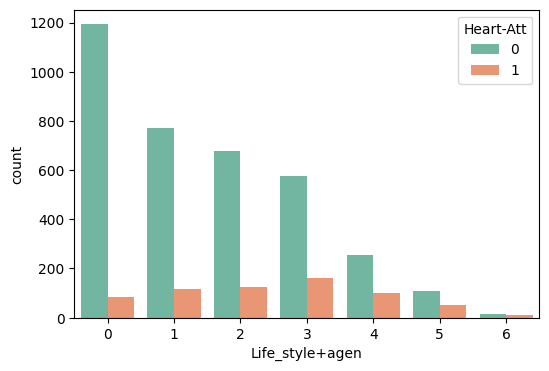

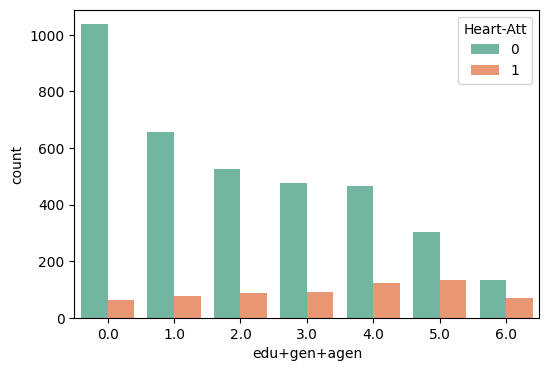

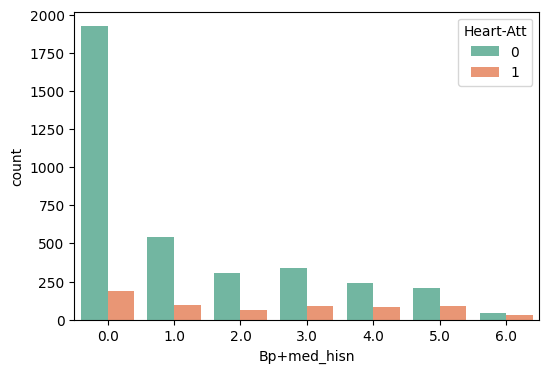

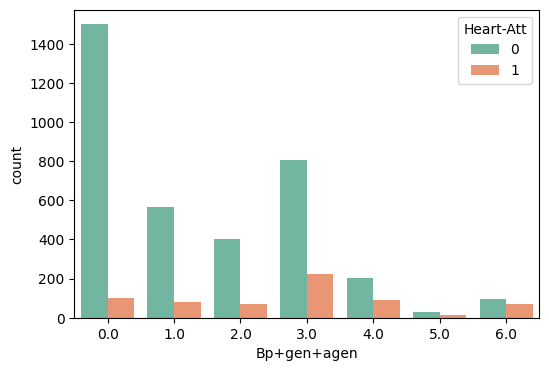

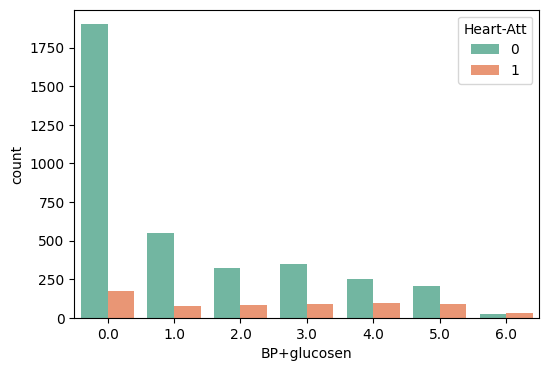

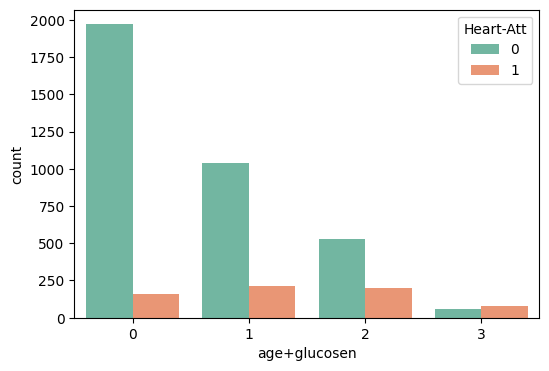

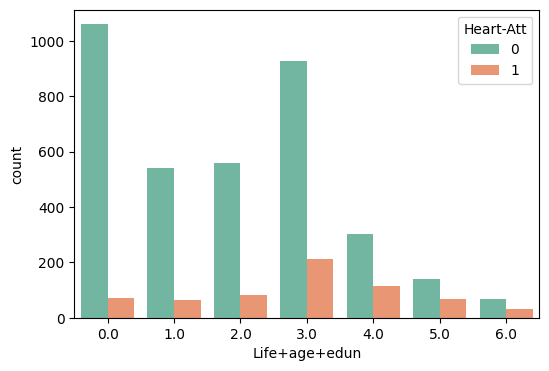

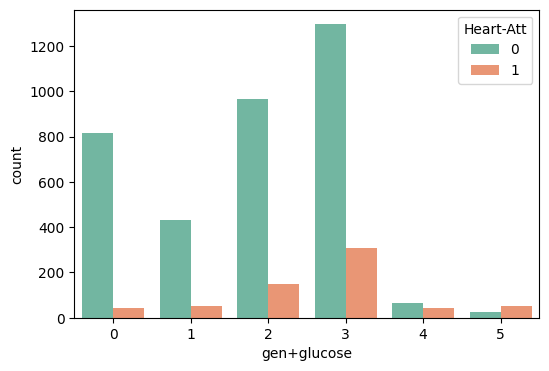

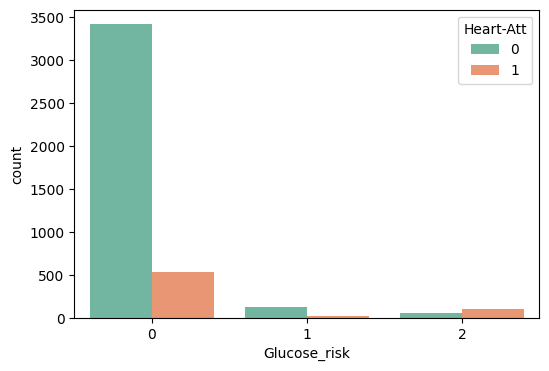

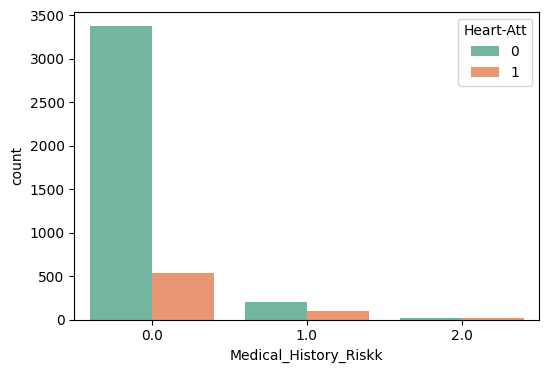

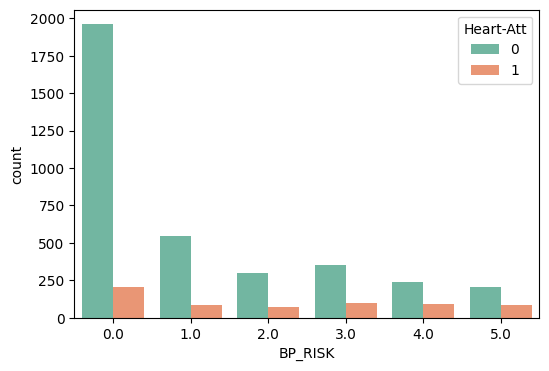

In [47]:
for col in x.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df,x=col,hue='Heart-Att',palette='Set2')

In [48]:
corr=x.corr()

<Axes: >

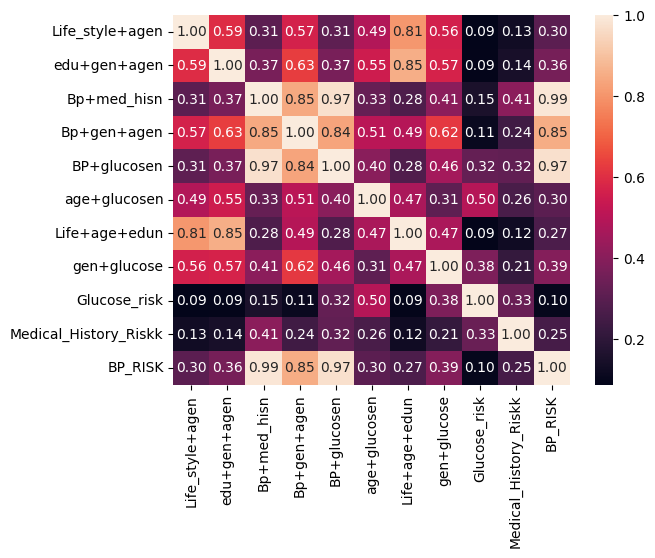

In [49]:
sns.heatmap(corr,annot=True,fmt='.2f')

In [105]:
from scipy.stats import ttest_ind

# List of engineered features
features = ['Life_style+agen', 'edu+gen+agen',  'Bp+gen+agen',
            'BP+glucosen', 'age+glucosen',
            'gen+glucose', 'Glucose_risk', 'Medical_History_Riskk']

# Separate groups based on Heart-Att
group0 = df[df['Heart-Att'] == 0]
group1 = df[df['Heart-Att'] == 1]

# Perform t-test for each feature
for col in features:
    stat, pval = ttest_ind(group0[col], group1[col], equal_var=False, nan_policy='omit')
    print(f"{col}: t-statistic = {stat:.4f}, p-value = {pval:.4f}")


Life_style+agen: t-statistic = -13.5713, p-value = 0.0000
edu+gen+agen: t-statistic = -15.4689, p-value = 0.0000
Bp+gen+agen: t-statistic = -16.3396, p-value = 0.0000
BP+glucosen: t-statistic = -14.4635, p-value = 0.0000
age+glucosen: t-statistic = -16.4977, p-value = 0.0000
gen+glucose: t-statistic = -15.2918, p-value = 0.0000
Glucose_risk: t-statistic = -9.2132, p-value = 0.0000
Medical_History_Riskk: t-statistic = -6.9141, p-value = 0.0000


In [106]:
from scipy.stats import f_oneway

# Example: use ANOVA across all Heart-Att values (works for multiclass)
for col in features:
    groups = [df[df['Heart-Att'] == val][col] for val in df['Heart-Att'].unique()]
    f_stat, pval = f_oneway(*groups)
    print(f"{col}: F-statistic = {f_stat:.4f}, p-value = {pval:.4f}")


Life_style+agen: F-statistic = 197.1201, p-value = 0.0000
edu+gen+agen: F-statistic = 244.0314, p-value = 0.0000
Bp+gen+agen: F-statistic = 311.3338, p-value = 0.0000
BP+glucosen: F-statistic = 268.9747, p-value = 0.0000
age+glucosen: F-statistic = 363.3064, p-value = 0.0000
gen+glucose: F-statistic = 225.9538, p-value = 0.0000
Glucose_risk: F-statistic = 245.2680, p-value = 0.0000
Medical_History_Riskk: F-statistic = 98.0624, p-value = 0.0000


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[features].dropna()
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)



                 Feature        VIF
0        Life_style+agen   4.815741
1           edu+gen+agen   6.036948
2            Bp+gen+agen  18.167823
3            BP+glucosen   9.129477
4           age+glucosen   4.937944
5            gen+glucose   7.155934
6           Glucose_risk   2.962331
7  Medical_History_Riskk   1.288112


In [57]:
df['Bp+med_hisn'].value_counts()

Bp+med_hisn
0.0    2115
1.0     637
3.0     428
2.0     370
4.0     323
5.0     298
6.0      69
Name: count, dtype: int64

In [58]:
pd.crosstab(df['Bp+med_hisn'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
Bp+med_hisn,,
0.0,0.910638,0.089362
1.0,0.852433,0.147567
2.0,0.821622,0.178378
3.0,0.787383,0.212617
4.0,0.739938,0.260062
5.0,0.691275,0.308725
6.0,0.594203,0.405797


In [59]:
df['BP+glucosen'].value_counts()

BP+glucosen
0.0    2072
1.0     627
3.0     437
2.0     408
4.0     345
5.0     298
6.0      53
Name: count, dtype: int64

In [60]:
pd.crosstab(df['BP+glucosen'],df['Heart-Att'],normalize='index')

Heart-Att,0,1
BP+glucosen,,
0.0,0.917471,0.082529
1.0,0.874003,0.125997
2.0,0.791667,0.208333
3.0,0.789474,0.210526
4.0,0.727536,0.272464
5.0,0.691275,0.308725
6.0,0.415094,0.584906


In [108]:
x= df[['Life_style+agen', 'edu+gen+agen',  'Bp+gen+agen',
            'BP+glucosen', 'age+glucosen', 
            'gen+glucose', 'Glucose_risk', 'Medical_History_Riskk']]

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
y=df['Heart-Att']

In [272]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [273]:
xtrain.shape

(3392, 8)

In [274]:
ytrain.shape

(3392,)

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
RF=RandomForestClassifier(oob_score=True,random_state=42)

In [166]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(oob_score=True, random_state=42)

In [167]:
RF.score(xtrain,ytrain)

0.9099842767295597

In [168]:
RF.score(xtest,ytest)

0.8354952830188679

In [119]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [120]:
ytrain_predict=RF.predict(xtrain)
ytest_predict=RF.predict(xtest)

In [121]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2519
           1       0.86      0.48      0.61       449

    accuracy                           0.91      2968
   macro avg       0.88      0.73      0.78      2968
weighted avg       0.90      0.91      0.90      2968



In [122]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1077
           1       0.47      0.19      0.28       195

    accuracy                           0.84      1272
   macro avg       0.67      0.58      0.59      1272
weighted avg       0.81      0.84      0.81      1272



In [123]:
pd.DataFrame(RF.feature_importances_,columns=['Important_features'],index=x.columns).sort_values(by='Important_features',ascending=False)

,Important_features
Life_style+agen,0.249596
edu+gen+agen,0.195470
BP+glucosen,0.138516
Bp+gen+agen,0.113112
age+glucosen,0.093168
gen+glucose,0.088956
Medical_History_Riskk,0.069750
Glucose_risk,0.051432


In [124]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [125]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [368]:
brf = BalancedRandomForestClassifier(n_estimators=500, random_state=42)

In [369]:
brf.fit(xtrain,ytrain)

BalancedRandomForestClassifier(n_estimators=500, random_state=42)

In [370]:
ytrain_predict=brf.predict(xtrain)
ytest_predict=brf.predict(xtest)

In [371]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2877
           1       0.40      0.87      0.55       515

    accuracy                           0.78      3392
   macro avg       0.68      0.82      0.70      3392
weighted avg       0.88      0.78      0.81      3392



In [372]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       719
           1       0.25      0.53      0.34       129

    accuracy                           0.69       848
   macro avg       0.57      0.62      0.57       848
weighted avg       0.80      0.69      0.73       848



In [131]:
from xgboost import XGBClassifier

In [132]:
from collections import Counter

In [133]:
counter=Counter(ytrain)
scale=counter[0]/counter[1]

In [134]:
print(scale)

5.610244988864142


In [135]:
xgb=XGBClassifier( n_estimators=300,
    max_depth=20,
    random_state=42,scale_pos_weight=3,booster='gbtree',learning_rate=0.8,
                  gamma=0,min_child_weight=1,colsample_bytree=1,colsample_bylevel=1,grow_policy='depthwise')

In [136]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [137]:
ytrain_predict=xgb.predict(xtrain)
ytest_predict=xgb.predict(xtest)

In [138]:
print(classification_report(ytrain,ytrain_predict))


              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2519
           1       0.57      0.75      0.65       449

    accuracy                           0.88      2968
   macro avg       0.76      0.83      0.79      2968
weighted avg       0.90      0.88      0.88      2968



In [139]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1077
           1       0.29      0.33      0.31       195

    accuracy                           0.77      1272
   macro avg       0.58      0.59      0.59      1272
weighted avg       0.79      0.77      0.78      1272



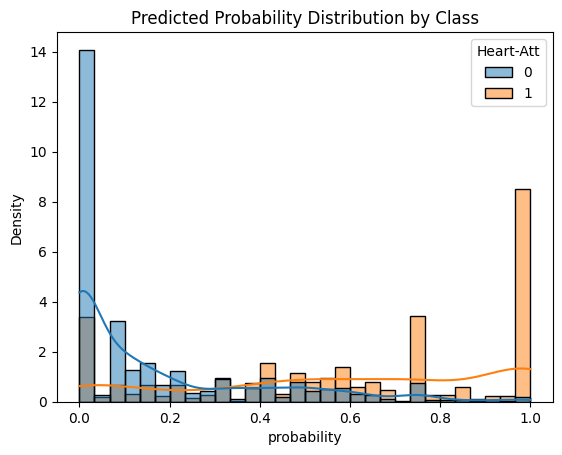

In [140]:
probs = xgb.predict_proba(x)[:, 1]

# 2. Combine probs and true labels into a DataFrame
df_plot = pd.DataFrame({
    'probability': probs,
    'Heart-Att': y
})

# 3. Plot using seaborn
sns.histplot(data=df_plot, x='probability', hue='Heart-Att', bins=30, kde=True, stat="density", common_norm=False)
plt.title("Predicted Probability Distribution by Class")
plt.show()

In [325]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,sampling_strategy='minority')
X_res, y_res = sm.fit_resample(xtrain,ytrain)

mod=XGBClassifier( n_estimators=500)

mod.fit(X_res,y_res)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [321]:
y_res.value_counts()

Heart-Att
0    2877
1    2877
Name: count, dtype: int64

In [326]:
ytrain_predict=mod.predict(X_res)
ytest_predict=mod.predict(xtest)

In [327]:
print(classification_report(y_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2877
           1       0.91      0.85      0.88      2877

    accuracy                           0.88      5754
   macro avg       0.88      0.88      0.88      5754
weighted avg       0.88      0.88      0.88      5754



In [328]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       719
           1       0.29      0.33      0.31       129

    accuracy                           0.78       848
   macro avg       0.59      0.59      0.59       848
weighted avg       0.79      0.78      0.78       848



In [297]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "max_depth": [ 7,10,12],
    "learning_rate": [ 0.2,0.5,0.8],
    "n_estimators": [1000, 300, 500],
    "subsample": [0.5,0.8, 0.3],
    "colsample_bytree": [0.8, 1.0],
    "scale_pos_weight": [2, 5, 5* 2]
}

search = RandomizedSearchCV(mod, param_distributions=params, n_iter=20, 
                            scoring="f1_macro", cv=5, random_state=42, n_jobs=-1)
search.fit(X_res, y_res)




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_co...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.2, 0.5, 0.8],
                                        'max_depth': [7, 10, 12],
                                        'n_estimators': [1000, 300, 500],
                                        'scale_pos_weight': [2, 5, 10],
                                        'subsample': [0.5, 0.8, 0.3]},
                   random_state=42, scoring='f1_macro')

In [298]:
best_model = search.best_estimator_
y_pred_test = best_model.predict(xtest)


In [299]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       719
           1       0.25      0.43      0.31       129

    accuracy                           0.72       848
   macro avg       0.57      0.60      0.57       848
weighted avg       0.79      0.72      0.74       848



In [283]:
search.best_params_



{'subsample': 0.5,
 'scale_pos_weight': 2,
 'n_estimators': 300,
 'max_depth': 7,
 'learning_rate': 0.2,
 'colsample_bytree': 0.8}

In [300]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(xtrain, ytrain)


In [312]:
mod1=XGBClassifier( n_estimators=500, scale_pos_weight=1.5, random_state=42)

mod1.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [313]:
ytrain_predict=mod1.predict(X_res)
ytest_predict=mod1.predict(xtest)

In [314]:
print(classification_report(y_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2877
           1       0.82      0.80      0.81      2877

    accuracy                           0.81      5754
   macro avg       0.81      0.81      0.81      5754
weighted avg       0.81      0.81      0.81      5754



In [315]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       719
           1       0.27      0.47      0.34       129

    accuracy                           0.73       848
   macro avg       0.58      0.62      0.58       848
weighted avg       0.80      0.73      0.75       848



In [330]:
from imblearn.under_sampling import RandomUnderSampler

In [331]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(xtrain, ytrain)


In [333]:
modu=XGBClassifier( n_estimators=500)

In [334]:
modu.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [352]:
ytrain_predict=modu.predict(X_train_under)
ytest_predict=modu.predict(xtest)

In [353]:
print(classification_report(y_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2877
           1       0.84      0.87      0.85      2877

    accuracy                           0.85      5754
   macro avg       0.85      0.85      0.85      5754
weighted avg       0.85      0.85      0.85      5754



In [354]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       719
           1       0.26      0.43      0.32       129

    accuracy                           0.72       848
   macro avg       0.57      0.60      0.57       848
weighted avg       0.79      0.72      0.75       848



In [341]:
from imblearn.over_sampling import RandomOverSampler

In [343]:
oversampler = RandomOverSampler(random_state=42)



In [348]:
X_train_over, y_train_over = oversampler.fit_resample(xtrain, ytrain)

In [349]:
modo=XGBClassifier( n_estimators=500)

In [351]:
modo.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [355]:
ytrain_predict=modo.predict(X_train_over)
ytest_predict=modo.predict(xtest)

In [356]:
print(classification_report(y_res,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2877
           1       0.84      0.87      0.85      2877

    accuracy                           0.85      5754
   macro avg       0.85      0.85      0.85      5754
weighted avg       0.85      0.85      0.85      5754



In [357]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       719
           1       0.26      0.43      0.32       129

    accuracy                           0.72       848
   macro avg       0.57      0.60      0.57       848
weighted avg       0.79      0.72      0.75       848



In [373]:
brfo = BalancedRandomForestClassifier(n_estimators=500, random_state=42)

In [374]:
brfo.fit(X_train_over, y_train_over)

BalancedRandomForestClassifier(n_estimators=500, random_state=42)

In [376]:
ytrain_predict=brfo.predict(X_train_over)
ytest_predict=brfo.predict(xtest)

In [377]:
print(classification_report(y_train_over,ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2877
           1       0.83      0.88      0.86      2877

    accuracy                           0.85      5754
   macro avg       0.86      0.85      0.85      5754
weighted avg       0.86      0.85      0.85      5754



In [378]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       719
           1       0.27      0.47      0.34       129

    accuracy                           0.73       848
   macro avg       0.58      0.62      0.59       848
weighted avg       0.80      0.73      0.76       848



In [444]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(200,), activation='relu')
mlp.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(200,))

In [445]:
ytrain_predict=mlp.predict(xtrain)
ytest_predict=mlp.predict(xtest)

In [446]:
print(classification_report(ytrain,ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2877
           1       0.72      0.19      0.30       515

    accuracy                           0.87      3392
   macro avg       0.79      0.59      0.61      3392
weighted avg       0.85      0.87      0.83      3392



In [443]:
print(classification_report(ytest,ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       719
           1       0.28      0.59      0.38       129

    accuracy                           0.70       848
   macro avg       0.59      0.66      0.59       848
weighted avg       0.81      0.70      0.74       848



Best Threshold for Maximum Recall: 0.00
Maximum Recall: 1.00


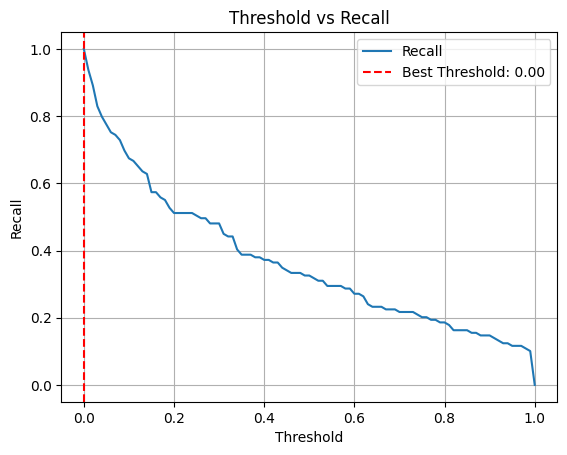

In [387]:
y_proba = mod.predict_proba(xtest)[:, 1]  # probability for class 1
y_true = ytest

# 4. Threshold tuning for maximum recall
thresholds = np.arange(0.0, 1.01, 0.01)
recalls = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    recalls.append(recall_score(y_true, y_pred))

# 5. Find best threshold
best_index = np.argmax(recalls)
best_threshold = thresholds[best_index]
max_recall = recalls[best_index]

print(f"Best Threshold for Maximum Recall: {best_threshold:.2f}")
print(f"Maximum Recall: {max_recall:.2f}")

# 6. Optional: Plot
plt.plot(thresholds, recalls, label='Recall')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Threshold vs Recall')
plt.legend()
plt.grid(True)
plt.show()


In [423]:
y_proba = mlp.predict_proba(xtest)[:, 1]

In [436]:
y_pred = (y_proba >= 0.41).astype(int)

In [437]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       719
           1       0.25      0.67      0.36       129

    accuracy                           0.64       848
   macro avg       0.58      0.65      0.55       848
weighted avg       0.81      0.64      0.69       848

